In [ ]:
# Mount Drive if needed
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%%shell
jupyter nbconvert --to html /content/drive/MyDrive/434/Group Project/MeanieBot.ipynb

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['Also what’s the deal with Aberdeen restaurants asking you to pull out of line when it takes more than 30 seconds to… https://t.co/om8dI3uWdm', 'During Covid, free food helped rein in poverty in India: IMF paper India has "eliminated low-income poverty (which… https://t.co/RQjHMwBabV', 'What food do you absolutely hate that everyone else seems to love?', 'How you store your food matters. Take broccoli: it likes some moisture and cold air. Wrap it in a damp paper towel… https://t.co/Yei3OepC4y', 'Yangyang rides a skateboard from the West49 he works at around the food court, Jaemin works at a commission-based s… https://t.co/dwcSf9wwPU', 'no food or movies', 'y’all b fuckin niggas cause they buy you some food 😂😂😂', 'These restaurants with all these made up policies. Look I just want to eat! I spend coins on food!!', "Why aren't you vegan? — bc it’s expensive the food is

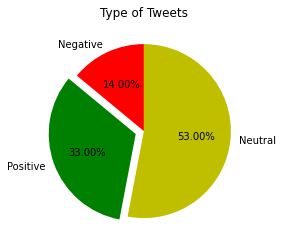

'\n# Under Construction\n#Replies to tweet\nstatus = "We love food! (This is a student bot in testing phase. Feel free to ignore this msg.)"\nin_reply_to_status_id = str(current_tweet_id)\napi.update_status(status, in_reply_to_status_id )\n#\'@${current_tweet_screenname}, I see you!\'\n'

In [ ]:
# This bot is based on a bot created by another group of people, and we have changed much of it
#   to fit our needs. We then added onto it to make it more robust.
# The github repo for the original code is here: https://github.com/Nathan-Jordan/Twitter-Sentiment-Analysis-Bot



#Install Tweepy
#!pip install tweepy
#Installation of graph interface
#!pip install matplotlib


import re
import tweepy
import pandas as pd
import numpy as np

#importing the graph interface
import matplotlib.pyplot as plt

from tweepy import OAuthHandler
from datetime import datetime
from pytz import timezone
import nltk # an amazing library to play with natural language
nltk.download('stopwords')  
from nltk.corpus import stopwords 


#Key inputs from Twitter - Enter your Twitter keys
consumer_api_key = '6M2WGvJkBoWqGIgsIhkxQBHCV'
consumer_api_secret = 'pYwg1ExoMosOBbV4hyrapbhHQ4rmyYRzJEQnlFwDCiFxFXARik' 
access_token = '1511055584438611969-EIq4mBDsu3Sk5S0IZJTfNG4gR58Yc9'
access_token_secret ='OAlfNvgyQkoYNKEXdhzWERbbb3lXyuQQDQJyLLsGxOTln'

#Create authorizer file
authorizer = OAuthHandler(consumer_api_key, consumer_api_secret)
authorizer.set_access_token(access_token, access_token_secret)

api = tweepy.API(authorizer ,timeout=15)

# Update status. Mostly used for testing purposes.
#api.update_status('MeanieBot reporting live.')

# Uses the twitter api to grab as many tweets as we want [items()] containing the key_word)
# It also filters out retweets, replies, and any posts with media (media makes it harder to know what the person is talking about)
current_tweets = []
key_word = 'food'
for tweet_object in tweepy.Cursor(api.search,q=key_word+"-filter:retweets AND -filter:replies AND -filter:media",lang='en',result_type='recent').items(100):
    current_tweets.append(tweet_object.text)
    current_tweet_id = tweet_object.id
    current_tweet_screenname = tweet_object.user.screen_name
print(current_tweets)
print(current_tweet_id)
print(current_tweet_screenname)


#imports and getting dataset from a sentiment analysis done by Kaggle
# Location: https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment?resource=download
tweets = pd.read_csv("/content/drive/MyDrive/434/Group Project/twitter_training.csv")
#print(tweets)

X = tweets.iloc[:, 3].values  # Tweet text
y = tweets.iloc[:, 2].values  # Sentiment score [-1,0,1]


processed_tweets = []

#Removes formatting of dataset tweets
for tweet in range(0, len(X)):  
    # Remove all the special characters
    processed_tweet = re.sub(r'\W', ' ', str(X[tweet]))
 
    # Remove all single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
 
    # Remove single characters from the start
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 
 
    # Substituting multiple spaces with single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
 
    # Removing prefixed 'b'
    processed_tweet = re.sub(r'^b\s+', '', processed_tweet)
 
    # Converting to Lowercase
    processed_tweet = processed_tweet.lower()
 
    processed_tweets.append(processed_tweet)

#print(X)

#Sentimental analysis 
from sklearn.feature_extraction.text import TfidfVectorizer  
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  
X = tfidfconverter.fit_transform(processed_tweets).toarray()
#print(X.shape[0])
#print(y.shape[0])


# Training
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=100)  
text_classifier.fit(X, y)

PositiveCount = 0
NeutralCount = 0
NegativeCount = 0

#print(X)

#Remove formating from current tweets
for tweet in current_tweets:
    # Remove all the special characters
    processed_tweet = re.sub(r'\W', ' ', tweet)
 
    # remove all single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
 
    # Remove single characters from the start
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 
 
    # Substituting multiple spaces with single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
 
    # Removing prefixed 'b'
    processed_tweet = re.sub(r'^b\s+', '', processed_tweet)
 
    # Converting to Lowercase
    processed_tweet = processed_tweet.lower()
 
    sentiment = text_classifier.predict(tfidfconverter.transform([ processed_tweet]).toarray())
    print(processed_tweet ,":", sentiment)

#Count of negative/positive/neutral
    if "Neutral" in sentiment:
      NeutralCount += 1
    elif "Negative" in sentiment:
      NegativeCount += 1
    else:
      PositiveCount += 1

#Percentage
PosPer = PositiveCount/len(current_tweets)*100
NegPer = NegativeCount/len(current_tweets)*100
NeuPer = NeutralCount/len(current_tweets)*100

#Prints out the sentiment analysis of the tweets
print("Negative Count:", NegativeCount, "- {:.2f}%".format(NegPer))
print("Neutral Count:", NeutralCount, "- {:.2f}%".format(NeuPer))
print("Positive Count: ", PositiveCount, "- {:.2f}%".format(PosPer))

#Creating pie chart using mathplotlib
labels = "Negative", "Positive", "Neutral"
sections = [NegPer, PosPer, NeuPer]
colors = ["r", "g", "y"]

plt.pie(sections, labels=labels, colors=colors,
        startangle=90,
        explode = (0, 0.1, 0),
        autopct = "%1.2f%%")

#creates the pi chart
plt.title("Type of Tweets")
plt.savefig("graph.png")  #Saves so it can be tweeted later
plt.show()

"""
# Under Construction still
# Thise section talked about in "Future Work" in the final report
#Replies to tweet
status = "Hey! Stop being so negative! (This is a student bot in testing phase. Feel free to ignore this msg.)"
in_reply_to_status_id = str(current_tweet_id)
api.update_status(status, in_reply_to_status_id )

"""